In [1]:
import sympy
import numpy as np
import pandas as pd
from sympy import latex, Matrix, symbols, lambdify, S
import matplotlib.pyplot as plt
from IPython.display import Latex
from google.colab import files
from skimage import io

# Практическое занятие 13
# Компьютерный практикум по алгебре на Python

## Собственные числа и собственные векторы линейного оператора.

Пусть для некоторого ненулевого вектора $x$ и числа $\lambda$ выполняется **$$Ax=\lambda x, \quad x\neq0,$$**
тогда $\lambda$ - **собственное число** линейного оператора $A$, а $x$ - **собственный вектор**, соответствующий собственному числу $\lambda$.

Собственные числа не зависят от выбора базиса!

Находить собственные числа можно, решая **характеристическое уравнение** $|A-\lambda E|=0$, где $E$ - единичная матрица подходящей размерности.

Собственные векторы получаются как решения СЛАУ $(A-\lambda E)x=0$, где $\lambda$ - соответствующее собственное число.

В sympy есть средства вычисления собственных чисел и векторов

**eigenvals** (словарь, ключи - собственные числа, значения - их кратности)

**eigenvects** (список кортежей, первый элемент кортежа - собственное число, второй - его кратность, третий - список собственных векторов, соответствующих этому собственному числу)

Если у оператора в трехмерном пространстве есть три собственных вектора, то в базисе из этих векторов матрица оператора диагональная, на диагонали - собственные числа оператора.

### Пример 1.
Дана матрица оператора В:
$$
\left(\begin{matrix}
1&0&1\\
0&1&-1\\
1&0&0
\end{matrix}\right)
$$

Найти собственные числа и собственные векторы матрицы оператора B. Вывести на экран и записать в файл .tex.

In [2]:
B = Matrix([[1, 0, 1], [0, 1, -1], [1, 0, 0]])
res = B.eigenvects()
display(Latex(latex(res)))

<IPython.core.display.Latex object>

Запишем в файл "sem_13_example_1.tex"

In [3]:
text = """ \\documentclass[11pt]{report}\n
\\usepackage[T2A]{fontenc}\n
\\usepackage[utf8]{inputenc}\n
\\usepackage[russian]{babel}\n
\\usepackage{amsmath,amssymb}\n
\\begin{document}\n
{\\bf Пример 1.}\n\n"""
end_text = "\n\n\\end{document}"
fname = 'sem_13_example_1.tex'
with open(fname, 'w', encoding='utf-8') as f:
    f.write(text + latex(res, mode='inline') + end_text)

## Собственные векторы numpy
### Пример 2.
Вывести на экран и записать в файл 'sem_13_example_2.xlsx' собственные числа и собственные векторы матрицы оператора В Примера 1.

In [4]:
B_np = np.array([[1, 0, 1], [0, 1, -1], [1, 0, 0]])
B_eigen_vals, B_eigen_vects = np.linalg.eig(B_np)
print(f"""Собственные векторы\n {np.round(B_eigen_vects, 3)}
с собственными числами\n {np.round(B_eigen_vals, 3)}""")

Собственные векторы
 [[ 0.     0.648 -0.465]
 [ 1.    -0.648  0.465]
 [ 0.     0.4    0.753]] 
с собственными числами
 [ 1.     1.618 -0.618]


Заметим, что собственные векторы расположены в столбцах массива np.array, причем собственные числа и собственные векторы идут в соответствующем порядке, т.е. первое собственное число соответствует собственному вектору в первом столбце и т.д.

Запишем в файл собственные векторы по столбцам, подписями к столбцам сделаем собственные числа.

In [5]:
fname = 'sem_13_example_2.xlsx'
df = pd.DataFrame(B_eigen_vects, columns=B_eigen_vals)
df.to_excel(fname, sheet_name='ev_col', header=True, index=False)

Допишем в файл на лист 'ev_row' собственные числа и соответствующие собственные векторы по строкам, подписи к строкам не делаем , подписями к столбцам будет текст.

In [6]:
columns = ['собственные числа', 'собственные векторы'] + [''] * (B_eigen_vects.shape[0] - 1)
with pd.ExcelWriter(fname, mode='a') as writer:
    df = pd.DataFrame(np.hstack((B_eigen_vects.T, np.array([B_eigen_vals]).T)), columns=columns)
    df.to_excel(writer, sheet_name='ev_row', index=False)

## Сингулярное разложение (SVD)
$$
A = U\Sigma V^*, \quad A_{m\times n},\ U_{m\times m}, \ \Sigma_{m\times n}, \ V_{n\times n},
$$
$U$, $V$ - ортогональные матрицы, $\Sigma$ - диагональная, на диагонали сингулярные числа.

В случае вещественной матрицы $V^* = V^T$, для комплексной $V^* = V^H$.

**Симметричная** (вещественная) матрица $A$: $A^T = A$.

**Эрмитова** (комплексная) матрица $A$: $A^H = A$, т.е. матрица совпадает с транспонированной матрицей из комплексно-сопряженных чисел, например, матрица
$\left(
\begin{matrix}
12&3+ i\\
3 - i&2
\end{matrix}
\right)$

## Пример 3
Найти SVD
$$
\left(
\begin{matrix}
1 & 0 & 0 & 1\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 1
\end{matrix}
\right)
$$

In [7]:
A3 = np.hstack((np.eye(3), np.ones((3, 1))))
U, sigma, Vh = np.linalg.svd(A3, full_matrices=True)
Sig = np.hstack((np.diag(sigma), np.zeros((3, 1))))
matr_dict = {'A': A3, 'V^T': Vh, '\sigma': sigma, 'U': U, '\Sigma': Sig,
             'U\Sigma V^T': U @ Sig @ Vh}
for key in matr_dict.keys():
    display(Latex(f'{key} = {sympy.latex(Matrix((matr_dict[key]).round(2)))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Приближенное разложение меньшего ранга
$$
A_{n\times n} = A_{n\times r} \times  A_{r\times n},\quad
r - \mbox{ ранг матрицы А}.
$$
Пусть SVD-разложение матрицы $A = U\Sigma V^*$, где
$$
\Sigma =
\left(
\begin{matrix}
\sigma_1 & 0 & 0 & ... & 0\\
0 & \sigma_2 & 0 & ... & 0 \\
0 &0 & ...& ... & 0\\
0 & ... & ...& ... & 0 \\
0 &0 & ... & ... & \sigma_n
\end{matrix}
\right),
$$
тогда $A_r = U\Sigma_r V^*$, где
$$
\Sigma_r  =
\left(
\begin{matrix}
\sigma_1 & 0 & 0 & ... & ... & 0\\
0 & \sigma_2 & 0 & ... & ... &0 \\
0 &0 & ...& ... & ... & 0\\
0 & ... & ...& \sigma_r & ... & 0 \\
0 &0 & ... & ... &... & 0\\
 ...  & ...  & ... & ... &... &  ... \\
0 &0 & ... & ... &... & 0\\
\end{matrix}
\right),
$$
## Пример 4
Построим приближение ранга 1 для матрицы $А_1$.
Пусть SVD-разложение матрицы $A = U\Sigma V^*$, где
$$
A_1 =
\left(
\begin{matrix}
6 & 0 & 6\\
0 & 12 & 6\\
6 & 6 & 9
\end{matrix}
\right),
$$


In [8]:
A4 = np.array([[6, 0, 6], [0, 12, 6], [6, 6, 9]])
U4, sigma4, Vh4 = np.linalg.svd(A4)
Sig4 = np.diag(sigma4)
k = 1
A4r =  U4[:, :k] @ np.diag(sigma4[:k]) @ Vh4[:k, :]
matr_dict = {'A': A4, 'V^T': Vh4, '\sigma': sigma4, 'U': U4, '\Sigma': Sig4,
             'U\Sigma V^T': U4 @ Sig4 @ Vh4, f'A_{{r={k}}}': A4r}
for key in matr_dict.keys():
    display(Latex(f'{key} = {sympy.latex(Matrix((matr_dict[key]).round(2)))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Применение приближения меньшего ранга для работы с изображениями.
# Пример 5
Представим изображение в оттенках серого в виде матрицы, для этого используем файл с изображением в формате jpg и функцию imread из пакета skimage.io

In [9]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
img = io.imread(fn, as_gray=True)

Saving mount.jpg to mount.jpg
User uploaded file "mount.jpg" with length 113001 bytes


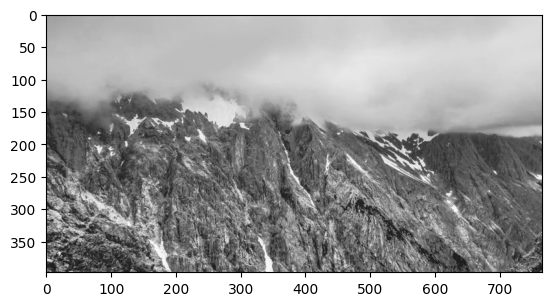

In [10]:
plt.imshow(img, cmap='Greys_r')

Получим SVD разложение матрицы img

In [11]:
U5, sigma5, Vh5 = np.linalg.svd(img, full_matrices=True)

Построим изображение для матрицы меньшего ранга, новый ранг возмем равным половине меньшего из чисел $m$ и $n$ - число строк и столбцов матрицы img.

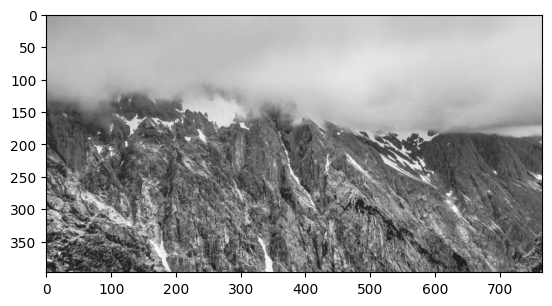

In [12]:
k = min(img.shape) // 2
img_half = U5[:, :k] @ np.diag(sigma5[:k]) @ Vh5[:k, :]
plt.imshow(img_half, cmap='Greys_r')

Еще сильнее сожмем изображение

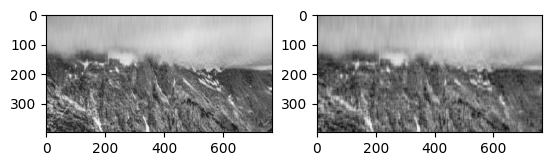

In [13]:
fig, _axs = plt.subplots(nrows=1, ncols=2)
axs = _axs.flatten()
for j, n in enumerate((5, 10)):
    k_ = k // n
    img_half = U5[:, :k_] @ np.diag(sigma5[:k_]) @ Vh5[:k_, :]
    axs[j].imshow(img_half, cmap='Greys_r')